# Ex3: Quantum error correction

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile

import qiskit.tools.jupyter
from qiskit.test.mock import FakeTokyo

In [2]:
code = QuantumRegister(5,'code')
syn = QuantumRegister(4,'syn')
out = ClassicalRegister(4,'output')

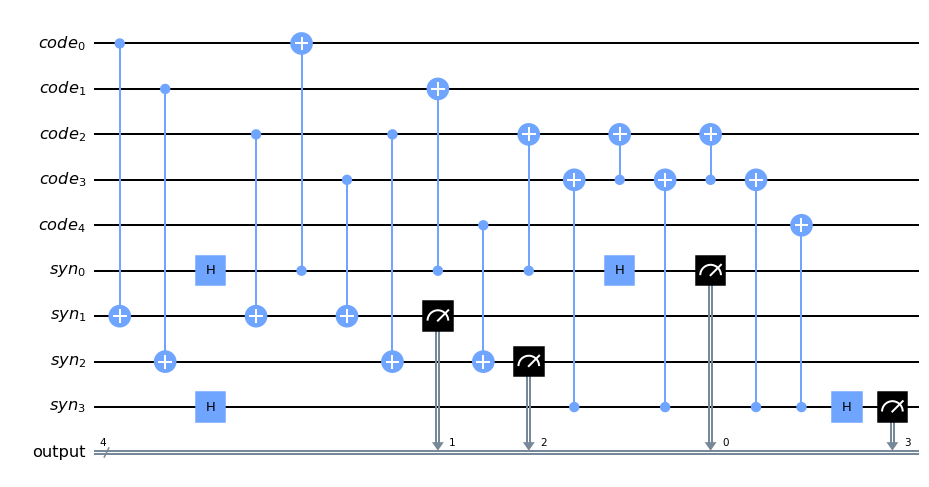

In [3]:
qc_syn = QuantumCircuit(code,syn,out)


# Left ZZZ
qc_syn.cx(code[0],syn[1])
qc_syn.cx(code[2],syn[1])
qc_syn.cx(code[3],syn[1])

# Right ZZZ
qc_syn.cx(code[1],syn[2])
qc_syn.cx(code[2],syn[2])
qc_syn.cx(code[4],syn[2])

# Top XXX
qc_syn.h(syn[0])
qc_syn.cx(syn[0],code[0])
qc_syn.cx(syn[0],code[1])
qc_syn.cx(syn[0],code[2])
qc_syn.h(syn[0])

# Bottom XXX
qc_syn.h(syn[3])


qc_syn.cx(syn[3],code[3])
qc_syn.cx(code[3],code[2])
qc_syn.cx(syn[3],code[3])
qc_syn.cx(code[3],code[2])

qc_syn.cx(syn[3],code[3])
qc_syn.cx(syn[3],code[4])

qc_syn.h(syn[3])

# Measure the auxilliary qubits
qc_syn.measure(syn,out)
qc_syn.draw('mpl')

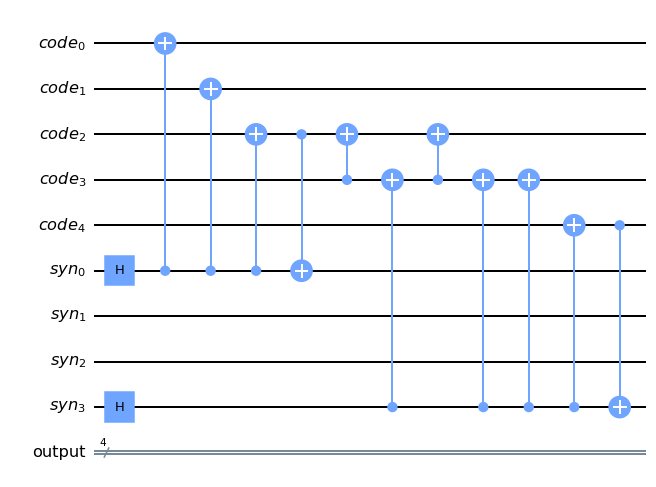

In [4]:
qc_init = QuantumCircuit(code,syn,out)

qc_init.h(syn[0])
qc_init.cx(syn[0],code[0])
qc_init.cx(syn[0],code[1])
qc_init.cx(syn[0],code[2])
qc_init.cx(code[2],syn[0])

qc_init.h(syn[3])
qc_init.cx(code[3],code[2])
qc_init.cx(syn[3],code[3])
qc_init.cx(code[3],code[2])
qc_init.cx(syn[3],code[3])
qc_init.cx(syn[3],code[3])

qc_init.cx(syn[3],code[4])
qc_init.cx(code[4],syn[3])

qc_init.draw('mpl')

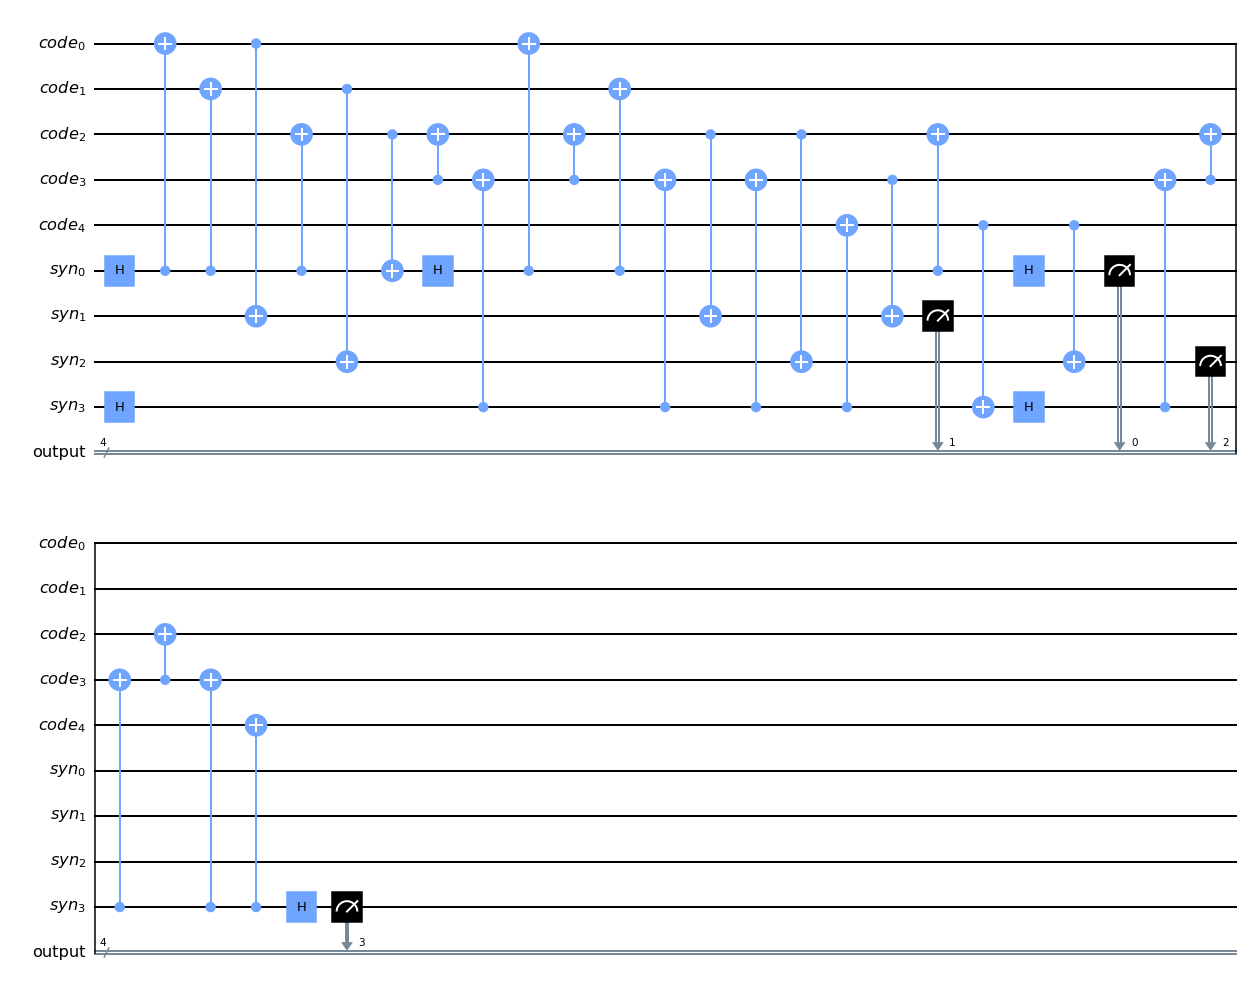

{'0000': 1024}

In [5]:
qc = qc_init.compose(qc_syn)
display(qc.draw('mpl'))

job = Aer.get_backend('qasm_simulator').run(qc)
job.result().get_counts()

In [6]:
error_qubits = [0,4]
qc.qubits

[Qubit(QuantumRegister(5, 'code'), 0),
 Qubit(QuantumRegister(5, 'code'), 1),
 Qubit(QuantumRegister(5, 'code'), 2),
 Qubit(QuantumRegister(5, 'code'), 3),
 Qubit(QuantumRegister(5, 'code'), 4),
 Qubit(QuantumRegister(4, 'syn'), 0),
 Qubit(QuantumRegister(4, 'syn'), 1),
 Qubit(QuantumRegister(4, 'syn'), 2),
 Qubit(QuantumRegister(4, 'syn'), 3)]

In [7]:
def insert(errors,error_qubits,code,syn,out):

    qc_insert = QuantumCircuit(code,syn,out)

    if 'x0' in errors:
        qc_insert.x(error_qubits[0])
    if 'x1' in errors:
        qc_insert.x(error_qubits[1])
    if 'z0' in errors:
        qc_insert.z(error_qubits[0])
    if 'z1' in errors:
        qc_insert.z(error_qubits[1])
        
    return qc_insert

In [8]:
for error in ['x0','x1','z0','z1']:
    
    qc = qc_init.compose(insert([error],error_qubits,code,syn,out)).compose(qc_syn)
    job = Aer.get_backend('qasm_simulator').run(qc)
    
    print('\nFor error '+error+':')
    counts = job.result().get_counts()
    for output in counts:
        print('Output was',output,'for',counts[output],'shots.')


For error x0:
Output was 0010 for 1024 shots.

For error x1:
Output was 0100 for 1024 shots.

For error z0:
Output was 0001 for 1024 shots.

For error z1:
Output was 1000 for 1024 shots.


In [9]:
# Please use the backend given here
backend = FakeTokyo()
backend

<FakeTokyo('fake_tokyo') from None()>

In [10]:
qc = qc_init.compose(qc_syn)
qc = transpile(qc, basis_gates=['u','cx'])
qc.num_nonlocal_gates()

24

In [11]:
qc1 = transpile(qc,backend,basis_gates=['u','cx'], optimization_level=3)
qc1.num_nonlocal_gates()

24

In [12]:
initial_layout = [0,2,6,10,12,1,5,7,11]
initial_layout = [6,8,12,16,18,7,11,13,17]
print(initial_layout)

[6, 8, 12, 16, 18, 7, 11, 13, 17]


In [13]:
qc2 = transpile(qc,backend,initial_layout=initial_layout, basis_gates=['u','cx'], optimization_level=3)
qc2.num_nonlocal_gates()

24

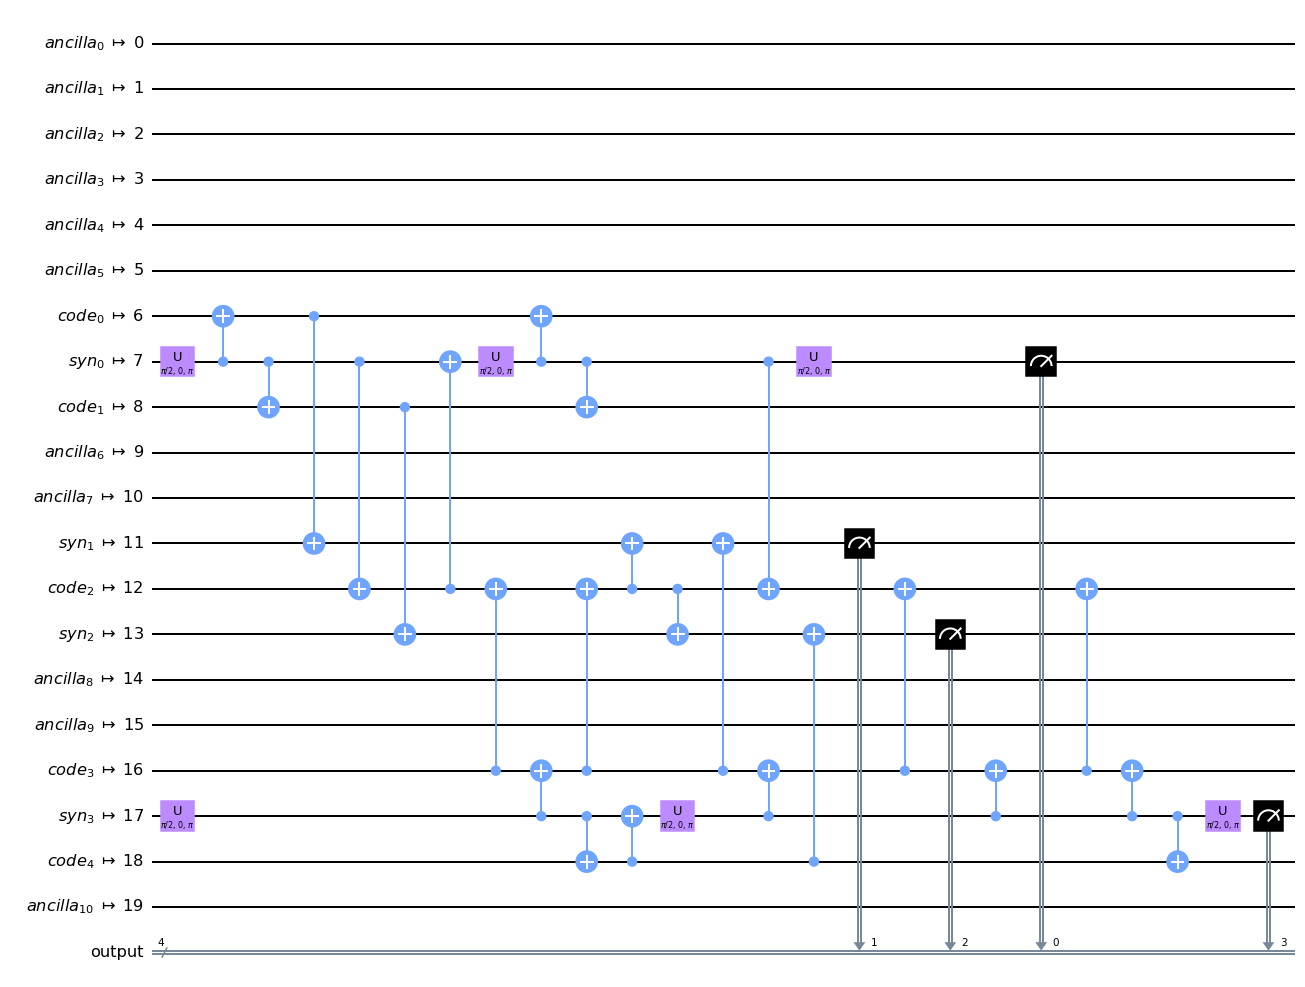

In [14]:
qc2.draw('mpl')

## By INNAN Nouhaila